### Importations

In [3]:
import numpy as np              # pour les tableaux
import pandas as pd             # pour visualiser les données
import matplotlib.pyplot as plt # pour les graphiques

## Données relevées

!!! note Note
Pour éviter la verbosité de cette manière de créer des tableaux, il est possible de d'abord créer une liste *puis* de la convertir en tableau avec la fonction `np.asarray` (littéralement, « comme un tableau ») :
```
f = [1, 2, 3]
f = np.asarray(f)
```
!!!

In [105]:
V = [i for i in range(20)]
V = np.asarray(V)

G = [3+0.3*v for v in V[V<10]] + [3+0.3*10+0.5*(v-10) for v in V[V>=10]]
G = np.asarray(G)

!!! tip Conseil
Pour voir des ensembles de liste, il est pratique de faire un `DataFrame`, comme suit :
`visu = pd.DataFrame([X,Y], index=['Label X', 'Label Y']).T`
et `.T` permet de transposer le tableau
!!!

In [106]:
visu = pd.DataFrame([V, G],
                    index=['Volume', 'Conductance']).T
visu

,Volume,Conductance
0,0.0,3.0
1,1.0,3.3
2,2.0,3.6
3,3.0,3.9
4,4.0,4.2
5,5.0,4.5
6,6.0,4.8
7,7.0,5.1
8,8.0,5.4
9,9.0,5.7


### Tracé du nuage de points

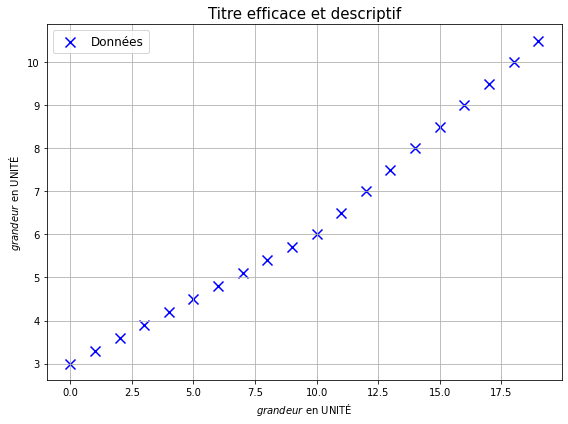

In [107]:
plt.close()                                 # force la fermeture des figures précédentes

plt.figure(figsize=(8, 6))                  # dimension horizontale, verticale
plt.grid()                                  # affiche un quadrillage de lecture
plt.xlabel('$grandeur$ en UNITÉ',           # Donne le nom de l'axe x, avec $$ pour le mode math
           fontsize=10)                     # en grand
plt.ylabel('$grandeur$ en UNITÉ',           # Donne le nom de l'axe y, avec $$ pour le mode math
           fontsize=10)                     # en grand

plt.scatter(V, G,                           # trace un graphe avec X en abscisse et Y en ordonnée
            marker='x', s=100,              # possibilité de customiser le tracé
            color='blue',       
            label='Données')                # pour la légende

plt.title('Titre efficace et descriptif',
          fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()                          # évite les débordements ou rognages
plt.show()

## Titrage conductimétrique : fonctions affines par morceaux
Dans le cas du suivi conductimétrique, la courbe de la régression est affine par morceaux. On voudrait modéliser chaque partie par une régression linéaire : il faut donc pour cela sélectionner une partie des données.

!!! abstract Prendre des parties de tableaux
Les tableaux `numpy` fonctionnent avec des index plus complexes que les listes : plutôt que de ne pouvoir sélectionner que des éléments selon leur ordre dans une liste (_via_ `liste[0]` par exemple), on peut sélectionner les éléments répondant à des **critères**, comme par exemple prendre les éléments d'un tableau dont les valeurs sont comprises entre 0 et 10. Pour cela, pour `T` un tableau `numpy`, on effetue~:
```
T[0<T<10]
```
!!!

!!! question Question
Créer le tableau `V_avant` des valeurs de `V` plus petites que $V_{\rm eq}$ et le tableau `V_après` des valeurs de `V` plus grandes que $V_{\rm eq}$. Créer le tableau `G_avant` des valeurs de `G` avant l'équivalence, et le tableau `G_après` des valeurs de `G`après l'équivalence.
!!!

In [108]:
V_avant = V[V<10]
V_après = V[V>=10]
G_avant = G[G<6]
G_après = G[G>=6]

!!! tip Utilisation des `dataframe`
Pour faire ces opérations plus rapidement et de manière conjointe, on peut utliser les `dataframe`. En effet, pour choisir les valeurs d'intérêt liées à une condition sur l'une d'entre elle, il suffit de créer un `dataframe` dérivé du premier par :
```
visu_avant = visu.loc[visu['Volume'] < 10]
```
`visu_avant` contient alors toutes les données telles que le volume est inférieur à 10. On peut réextraire les grandeurs `V_avant` avec `V_avant = visu_avant['Volume']` par exemple.
!!!

In [109]:
# Testez-moi !
visu_avant = visu.loc[visu['Volume'] < 10]
visu_avant

,Volume,Conductance
0,0.0,3.0
1,1.0,3.3
2,2.0,3.6
3,3.0,3.9
4,4.0,4.2
5,5.0,4.5
6,6.0,4.8
7,7.0,5.1
8,8.0,5.4
9,9.0,5.7


In [110]:
V_avant = visu_avant['Volume'].values
G_avant = visu_avant['Conductance'].values
V_avant, G_avant

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7]))

!!! tip Vérification
Vous pouvez vérifier que vous avez bien pris les bonnes valeurs en refaisant un tracé des nuages de points, avec des couleurs différentes.
!!!

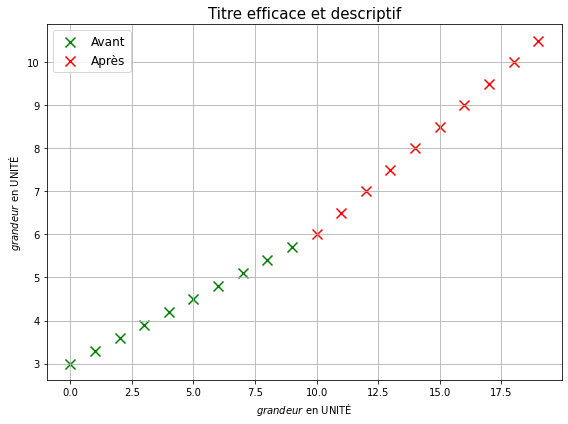

In [111]:
plt.close()                                 # force la fermeture des figures précédentes

plt.figure(figsize=(8, 6))                  # dimension horizontale, verticale
plt.grid()                                  # affiche un quadrillage de lecture
plt.xlabel('$grandeur$ en UNITÉ',           # Donne le nom de l'axe x, avec $$ pour le mode math
           fontsize=10)                     # en grand
plt.ylabel('$grandeur$ en UNITÉ',           # Donne le nom de l'axe y, avec $$ pour le mode math
           fontsize=10)                     # en grand

plt.scatter(V_avant, G_avant,               # trace un graphe avec X en abscisse et Y en ordonnée
            marker='x', s=100,              # possibilité de customiser le tracé
            color='green',       
            label='Avant')                  # pour la légende

plt.scatter(V_après, G_après,               # trace un graphe avec X en abscisse et Y en ordonnée
            marker='x', s=100,              # possibilité de customiser le tracé
            color='red',       
            label='Après')                # pour la légende


plt.title('Titre efficace et descriptif',
          fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()                          # évite les débordements ou rognages
plt.show()

## Validation d'un modèle linéaire par régression

!!! abstract Validation d'un modèle linéaire par régression

La fonction `polyfit(X,Y,d)` de la bibliothèque `numpy` ajuste au plus près 2 listes de données (abscisses `X`, ordonnées `Y`) par une fonction polynomiale de degrè `d`, et renvoie les coefficients du polynôme le mieux ajusté. Ainsi, pour le degrè 1, cela correspond à une regression linéaire $y = ax + b$.
!!!

!!! question Question
Calculez les coefficients `a_avant`, `b_avant` et `a_après`, `b_après` des régressions linéaires sur chaque portion des valeurs expérimentales.
!!!

In [112]:
a_avant, b_avant = np.polyfit(V_avant, G_avant, 1)         # « a » le coefficient directeur,
                                        # « b » l'ordonnée à l'origine
print(f"a = {a_avant:.3f}, b = {b_avant:.2f}") # .3f pour 3 valeurs après la virgule
a_après, b_après = np.polyfit(V_après, G_après, 1)         
print(f"a = {a_après:.3f}, b = {b_après:.2f}") # .3f pour 3 valeurs après la virgule

a = 0.300, b = 3.00
a = 0.500, b = 1.00


### Fonction pour le tracé

In [113]:
def yfunc(x, a, b):
    return a*x+b

!!! abstract Tracé d'une fonction : abscisse
Une fonction en $\texttt{Python}$ reste une application qui donne une image à un antécédant. Pour pouvoir en faire la représentation graphique, il faut définir toute une série de points sur lesquels on veut tracer pour ensuite les relier un à un. Pour cela, `np.linspace` permet de découper un intervalle de la valeur minimale voulue à la valeur maximale voulue, avec un nombre de points $N$.
!!!

!!! question Question
Ici, on veut tracer de la valeur minimale de `V_avant` à **un peu plus loin** que la valeur maximale de `V_avant`, en ayant suffisamment de points pour que le tracé soit efficace. Complétez le code suivant pour définir `xliste_avant` la liste des valeurs de `V` sur laquelle tracer, et de même pour après l'équivalence.
!!!

In [114]:
xliste_avant = np.linspace(min(V_avant), max(V_avant)+2, 100)
xliste_après = np.linspace(min(V_après)-2, max(V_après), 100)

!!! tip Indice
Les fonctions `min` et `max` existent.
!!!

!!! abstract Tracé d'une fonction : ordonnée
On a dont toutes les briques pour tracer la fonction : la fonction en elle-même, les valeurs d'abscisse, et les meilleurs paramètres. Pour avoir les ordonnées, il suffit de calculer `f(x, a, b)`.
!!!

In [115]:
yliste_avant = yfunc(xliste_avant, a_avant, b_avant)
yliste_après = yfunc(xliste_après, a_après, b_après)

!!! warning Attention
<center><b>
La seule façon valable de conclure à la validité d’une régression linéaire est une représentation graphique où l’on observe l’alignement des points avec la droite de régression.
</center>
!!!

## Tracé du graphe pour trouver $V_{\rm eq}$

!!! abstract Nuage de points vs. tracé continu
Le module `plt` permet de tracer. `plt.scatter` trace un nuage de points. `plt.plot` relie les points entre eux.
!!!

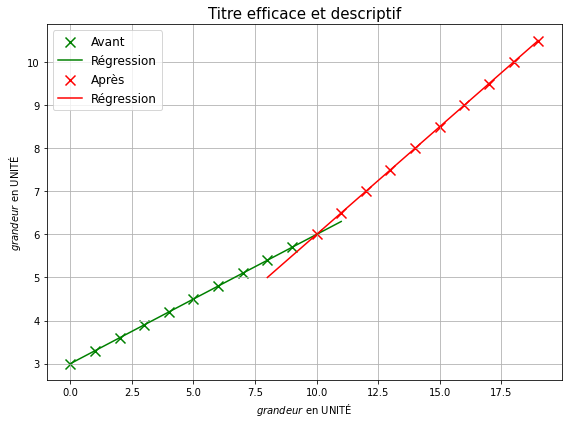

In [116]:
plt.close()                                 # force la fermeture des figures précédentes

plt.figure(figsize=(8, 6))                  # dimension horizontale, verticale
plt.grid()                                  # affiche un quadrillage de lecture
plt.xlabel('$grandeur$ en UNITÉ',           # Donne le nom de l'axe x, avec $$ pour le mode math
           fontsize=10)                     # en grand
plt.ylabel('$grandeur$ en UNITÉ',           # Donne le nom de l'axe y, avec $$ pour le mode math
           fontsize=10)                     # en grand

plt.scatter(V_avant, G_avant,               # trace un graphe avec X en abscisse et Y en ordonnée
            marker='x', s=100,              # possibilité de customiser le tracé
            color='green',       
            label='Avant')                  # pour la légende
plt.plot(xliste_avant, yliste_avant,
         color='green', label='Régression')

plt.scatter(V_après, G_après,
            marker='x', s=100,
            color='red',       
            label='Après')
plt.plot(xliste_après, yliste_après,
         color='red', label='Régression')

plt.title('Titre efficace et descriptif',
          fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()                          # évite les débordements ou rognages
plt.show()

#### Volume équivalent relevé

In [ ]:
VBeq = 

#### Concentrations C1 et CA

In [ ]:
C1 = 
CA = 

#### Degré expérimental

In [ ]:
d = 

#### Écart relatif

In [ ]:
E_r = 
print(E_r)

# V/ Valider : évaluation des incertitudes

## Incertitudes individuelles

### Incertitude sur CB

In [ ]:
CB = 1e-1 #mol.L-1
uCB = 0.01*CB

### Incertitude sur VA

In [ ]:
VA = 
uVA = 

### Incertitude sur VBeq

In [ ]:
uVBeq = 

## Simulation de Monte-Carlo pour obtenir des incertitudes de mesures

!!! abstract Fonctionnement Monte-Carlo
Pour obtenir des incertitudes sur une valeur composée d'autres valeurs :
- faire varier aléatoirement les $n$ couples de valeurs mesurées $(x_i,y_i)$ selon des **lois de probabilité uniformes rectangulaires** de demi-largeur la précision $\Delta(x_i) = \sqrt{3}u(x_i)$, simulée grâce à la fonction `np.random.uniform()` (même chose pour $y_i$).
- Pour chaque série de mesures simulée, faire le calcul de la valeur composée 
- La meilleure estimation est la moyenne des valeurs calculées
- L'incertitude associée est l'écart-type des valeurs calculées
!!!

In [48]:
# =========================================================================== #
#                                   Calculs                                   #
# =========================================================================== #

N = 100000                          # nombre de régressions à effectuer

C1list = []                         # initialisation liste vide
for i in range(N):
    CB_simu = # à vous
    VBeq_simu = # à vous
    VA_simu = # à vous

    C1list.append()

# =========================================================================== #
#                                 Utilisation                                 #
# =========================================================================== #

C1mean = np.mean(C1list)
uC1 = np.std(Clist, ddof=1)

print(f'C1 = {C1mean:.2f} ± {uC1:.2f}')

Coef.directeur = -2.045e-01 ± 1.406e-16
Ordonnée à l'origine = 2.106e+00 ± 1.211e-01
